In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.autograd import Variable
from sklearn import linear_model

%matplotlib inline
custom_style = {'axes.labelcolor': 'white',
                'xtick.color': 'white',
                'ytick.color': 'white'}
sns.set_style("darkgrid", rc=custom_style)
sns.set_context("notebook")
plt.style.use('dark_background')
plt.rcParams["font.size"] = 18

In [5]:
df = pd.read_csv('./ex1data1.txt',  header=None)
df.columns = ['y', 'x']

FileNotFoundError: File b'./ex1data1.txt' does not exist

In [477]:
df.head()

,y,x
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


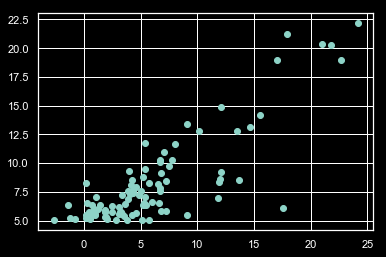

In [478]:
plt.scatter(df['x'], df['y'])

In [479]:
X = np.array(df['x'])
Y = np.array(df['y'])
X = X.reshape(-1,1)

In [480]:
X.shape

(97, 1)

In [481]:
clf = linear_model.LinearRegression()
fit = clf.fit(X, Y)

In [482]:
clf.coef_, clf.intercept_

(array([0.58844238]), 4.723805488900441)

In [483]:
x1 = np.linspace(0,25)
y_pred1 = x1 * clf.coef_ + clf.intercept_

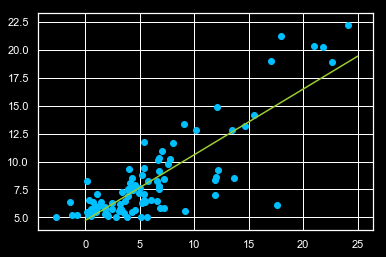

In [485]:
plt.plot(x, y_pred1, color='yellowgreen')
plt.scatter(df['x'], df['y'], color='deepskyblue')

In [487]:
losses = []
alpha = 0.02
epoch = 1000
df['Intercept'] = 1
xx = np.array(df[['x', 'Intercept']])
y = np.array(df['y']).reshape(-1,1)
N = y.shape[0]
x_iter = [s for s in range(len(losses))]

In [488]:
w = np.random.randn(2).reshape(2,1)

In [489]:
losses = []
for e in range(epoch):
    y_pred = np.dot(xx, w)
    error = (y - y_pred)
    w -= alpha * 1/N * np.dot(xx.T, (y_pred - y))
    loss = np.sum(1/2 * error**2)
    losses.append(loss)

In [490]:
x2 = np.linspace(0,25) 
y_pred2 = x2 * w[0] + w[1]

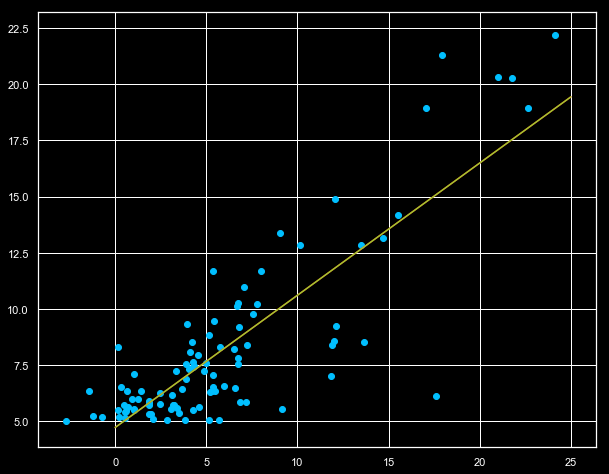

In [491]:
plt.figure(figsize=(10,8))
plt.plot(x1, y_pred1, color='red')
plt.plot(x2, y_pred2, color='yellowgreen')
plt.scatter(df['x'], df['y'], color='deepskyblue')

In [462]:
losses = []
alpha = 0.02
epoch = 100
N = y.shape[0]
df['Intercept'] = 1
xt = Variable(torch.Tensor(xx))
yt = Variable(torch.Tensor(y[:,0]))
# wt = Variable(torch.randn(2),requires_grad=True)
wt = torch.randn(2, requires_grad=True)
w = (wt.data.numpy()).reshape(2,1)

In [447]:
## numpy +偏微分を解析的に求めた例
losses = []
w = (wt.data.numpy()).reshape(2,1)
for e in range(epoch):
    y_pred = np.dot(xx, w)
    error = (y - y_pred)
    w -= alpha * 1/N * np.dot(xx.T, (y_pred - y))
    loss = 1/N * np.sum(1/2 * error**2)
    losses.append(loss)

In [448]:
## Tensor + 偏微分を解析的に求めた例
losses = []
wt = Variable(torch.randn(2),requires_grad=True)
for e in range(epoch):
    loss = None
    y_pred_t = torch.mv(xt, wt)
    wt = wt - alpha * 1/N * torch.mv(xt.t(),(y_pred_t - yt))
    error = (yt - y_pred_t)
    loss = 1/N * torch.sum(1/2 * error**2)
    losses.append(loss.data)

In [452]:
## Tensor + Augogradの例 1
losses = []
wt = Variable(torch.randn(2),requires_grad=True)
for e in range(epoch):
    loss = None
    y_pred_t = torch.mv(xt, wt)
    error = (y_pred_t - yt)
    loss = 1/N * torch.sum(1/2 * error**2)
    loss.backward()
    wt = Variable(wt - alpha * wt.grad, requires_grad = True)
    losses.append(loss.data)

In [446]:
## Tensor + Augogradの例 2
wt = Variable(torch.randn(2),requires_grad=True)
losses = []
for e in range(epoch):
    y_pred_t = torch.mv(xt, wt)
    error = (y_pred_t - yt)
    loss = 1/N * torch.sum(1/2 * error**2)
    loss.backward()
    with torch.no_grad(): ## dataのみにアクセス
        wt -= alpha * wt.grad
#         wt = wt- alpha * wt.grad ## これだと計算グラフが壊れる
        wt.grad.zero_() ## 微分を初期化
        
    losses.append(loss.data)

In [496]:
## Tensor + Augogradの例3
wt = Variable(torch.randn(2),requires_grad=True)
losses = []
for e in range(epoch):
    y_pred_t = torch.mv(xt, wt)
    error = (y_pred_t - yt)
    loss = 1/N * torch.sum(1/2 * error**2)
    loss.backward()
    wt.data = wt.data - alpha * wt.grad.data
    wt.grad.zero_()
    losses.append(loss.data)

In [467]:
wt.data.numpy()

array([0.77370167, 2.7033904 ], dtype=float32)

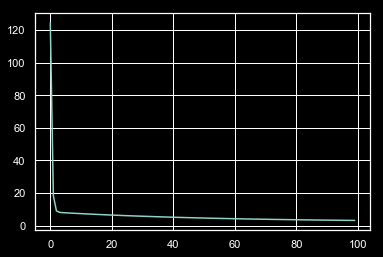

In [464]:
plt.plot(losses)

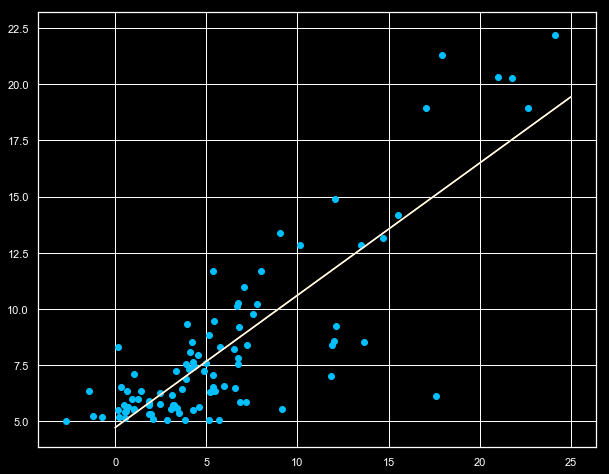

In [497]:
x1 = np.linspace(0,25)
y_pred1 = x1 * clf.coef_ + clf.intercept_
x2 = np.linspace(0,25) 
y_pred2 = x2 * w[0] + w[1]
w3 = wt.data.numpy()
y_pred3 = x2 * w3[0] + w3[1]
plt.figure(figsize=(10,8))
plt.plot(x1, y_pred1, color='red')
plt.plot(x2, y_pred2, color='yellowgreen')
plt.plot(x2, y_pred3, color='white')
plt.scatter(df['x'], df['y'], color='deepskyblue')

##  Pytorchのnn, optimモジュールを用いた回帰分析

In [498]:
from torch import nn, optim

In [584]:
df = pd.read_csv('./ex1data1.txt',  header=None)
df.columns = ['y', 'x']
df['Intercept'] = 1
xt = Variable(torch.Tensor(xx))
yt = Variable(torch.Tensor(y[:,0]).view(-1,1))

In [585]:
## Linear層を作成。今回は切片項は回帰係数に含めるので入力の次元は3、bias(切片)をFalseにする
net = nn.Linear(in_features=2, out_features=1, bias=False)
## 勾配降下法のオプティマイザーに上で定義したネットワークのパラメータを渡す
optimizer = optim.SGD(net.parameters(), lr = 0.01)
## MSE(mean squared error) lossクラス
loss_fn = nn.MSELoss()

In [612]:
losses = []
for e in range(epoch):
    ##  前回のbackwardで起算された勾配の値を削除
    optimizer.zero_grad()
    y_pred_t = net(xt)
    loss = loss_fn(y_pred_t, yt)
    loss.backward()
    # 勾配を更新
    optimizer.step()
    losses.append(loss.data)

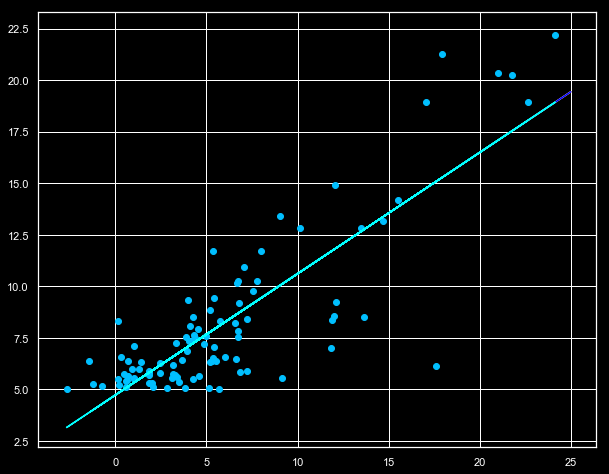

In [641]:
x1 = np.linspace(0,25)
y_pred1 = x1 * clf.coef_ + clf.intercept_
x2 = np.linspace(0,25) 
y_pred2 = x2 * w[0] + w[1]
w3 = wt.data.numpy()
y_pred3 = x2 * w3[0] + w3[1]
w4 = list(net.parameters())
w4 = w4[0].data.numpy()[0]
y_pred4 = x2 * w4[0] + w4[1]
predicted = net(xt).detach().numpy()
plt.figure(figsize=(10,8))
plt.plot(x1, y_pred1, color='red')
plt.plot(x2, y_pred2, color='yellowgreen')
plt.plot(x2, y_pred3, color='white')
plt.plot(x2, y_pred4, color='blue')
plt.plot(xx[:,0], predicted, color='cyan')
plt.scatter(df['x'], df['y'], color='deepskyblue')

## クラス化する

In [ ]:
df = pd.read_csv('./ex1data1.txt',  header=None)
df.columns = ['y', 'x']
df['Intercept'] = 1
xt = Variable(torch.Tensor(xx))
yt = Variable(torch.Tensor(y[:,0]).view(-1,1))

In [ ]:
input_size = xt.size()[1]
output_size = yt.size()[1]

In [646]:
class LinearRegression(nn.Module):
    
    def __init__(self, input_size, output_size, bias):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size, bias=bias)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [650]:
net = LinearRegression(input_size, output_size, False)
optimizer = optim.SGD(net.parameters(), lr = 0.01)
loss_fn = nn.MSELoss()

In [651]:
losses = []
for e in range(epoch):
    ##  前回のbackwardで起算された勾配の値を削除
    optimizer.zero_grad()
    y_pred_t = net(xt)
    loss = loss_fn(y_pred_t, yt)
    loss.backward()
    # 勾配を更新
    optimizer.step()
    losses.append(loss.data)

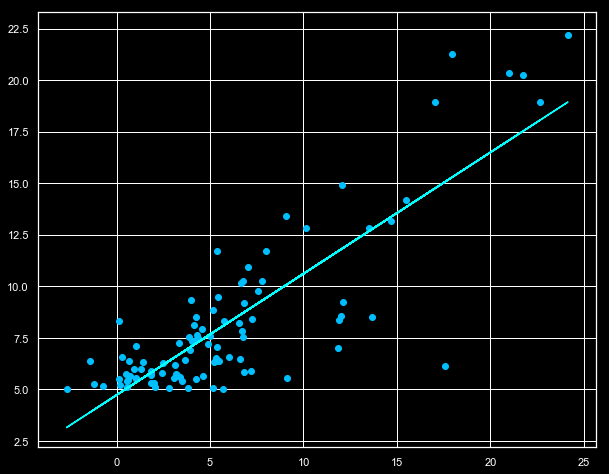

In [653]:
predicted = net(xt).detach().numpy()
plt.figure(figsize=(10,8))
plt.plot(xx[:,0], predicted, color='cyan')
plt.scatter(df['x'], df['y'], color='deepskyblue')